In [1]:
#Imported the libraries necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data
telco_data = pd.read_csv('Customer_Churn.csv')

In [3]:
# Display head of data
telco_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)            NaN       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
#I checked for the shape of the data using .shape
#I described the data using info() 

In [5]:
telco_data.shape

(7043, 21)

In [6]:
telco_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7033.000000
mean        0.162147    32.371149       64.759434
std         0.368612    24.559481       30.096565
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [7]:
# sum of all the missing values using isnull() and sum() 
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [8]:
#calculated the mean of ’MonthlyCharges’ using mean() and round()
mean_charges=round(telco_data['MonthlyCharges'].mean(),1)

In [9]:
mean_charges

64.8

In [10]:
#Fill in the missing entries with the calculated mean
telco_data['MonthlyCharges'].fillna(mean_charges, inplace=True)

In [11]:
#After I double checked to confirm that all missing values
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Data Visualization
%matplotlib inline
import plotly.express as px


In [13]:
#Created an interactive Histogram comparing the count relationship between the gender and Churn
telco_hist=px.histogram(telco_data, x='gender', color='Churn', marginal='box', color_discrete_sequence=['red','grey'])
telco_hist.update_layout(bargap=0.2)

<BarContainer object of 7043 artists>

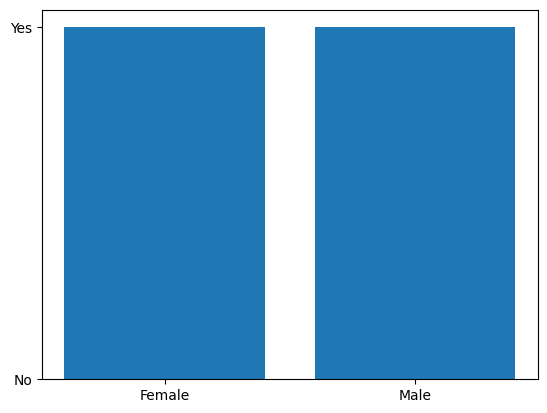

In [14]:
#I Created a bar showing showing relationship between ‘gender’ and ‘Churn’
plt.bar(telco_data['gender'],telco_data['Churn'])

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

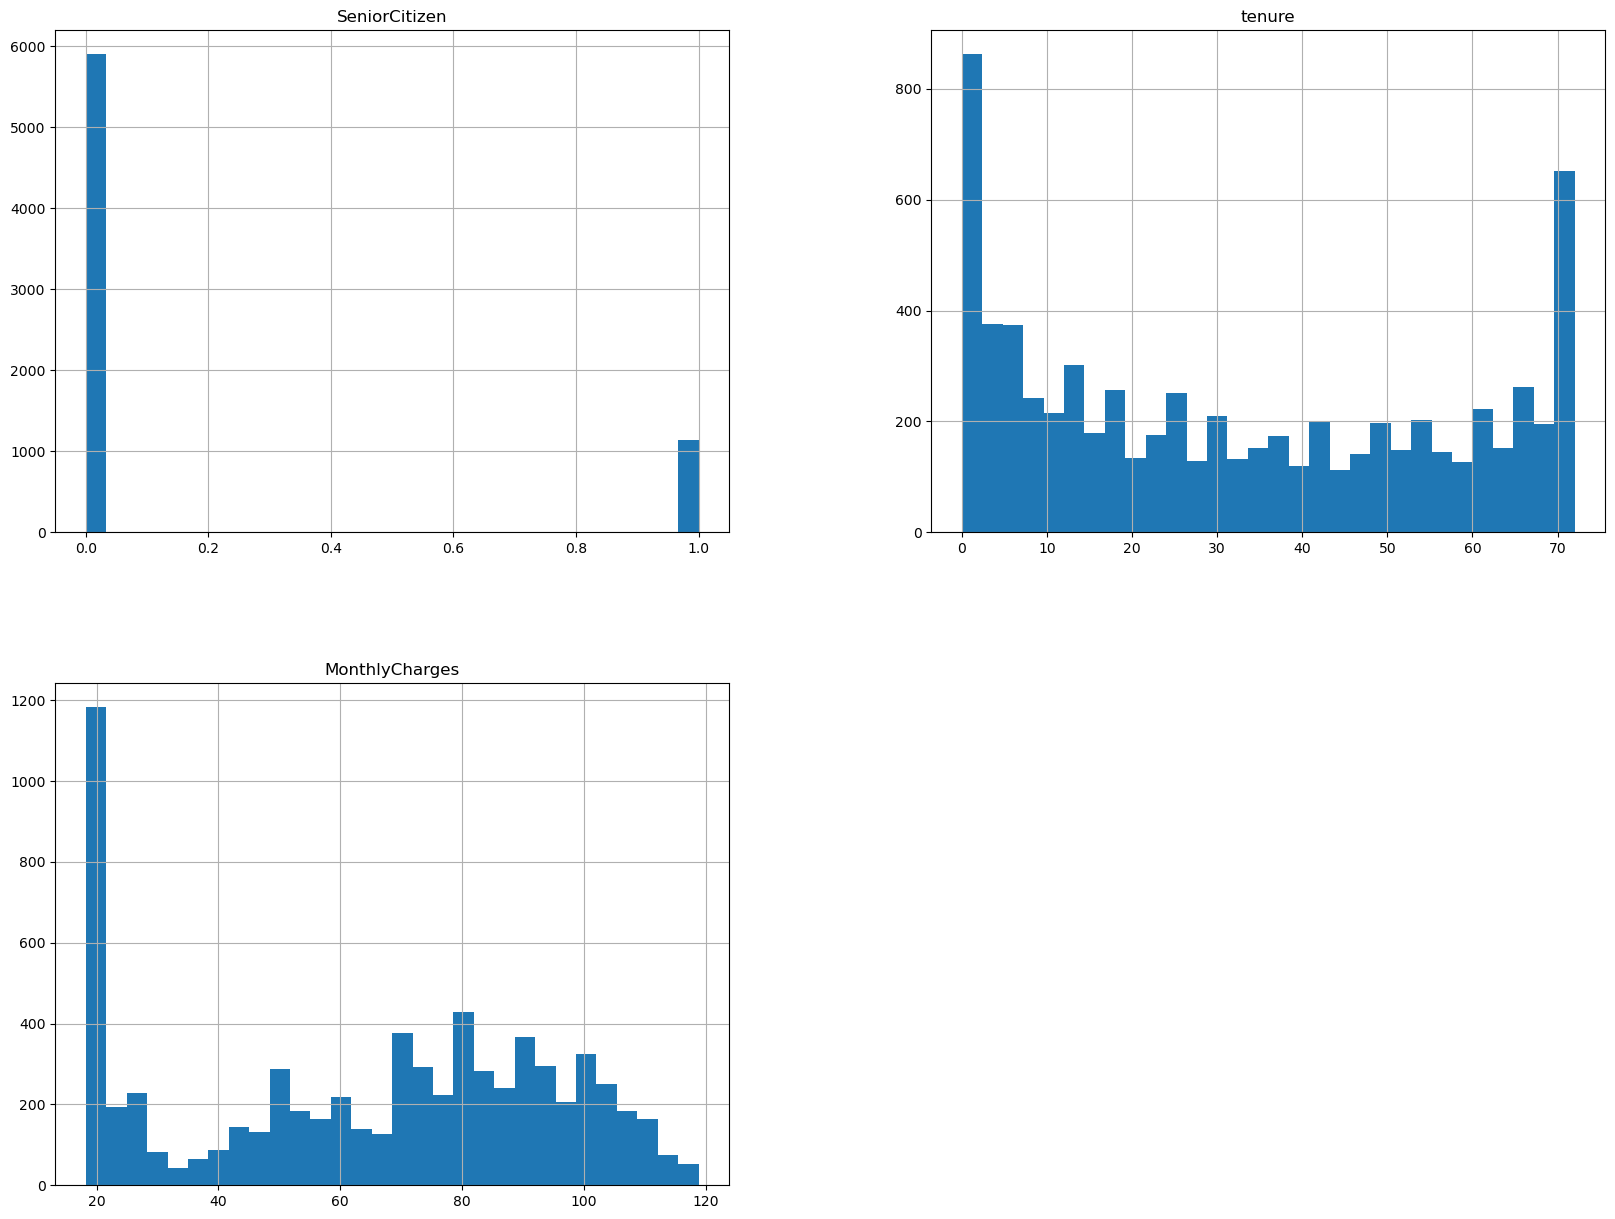

In [15]:
telco_data.hist(bins=30, figsize=(20,15))

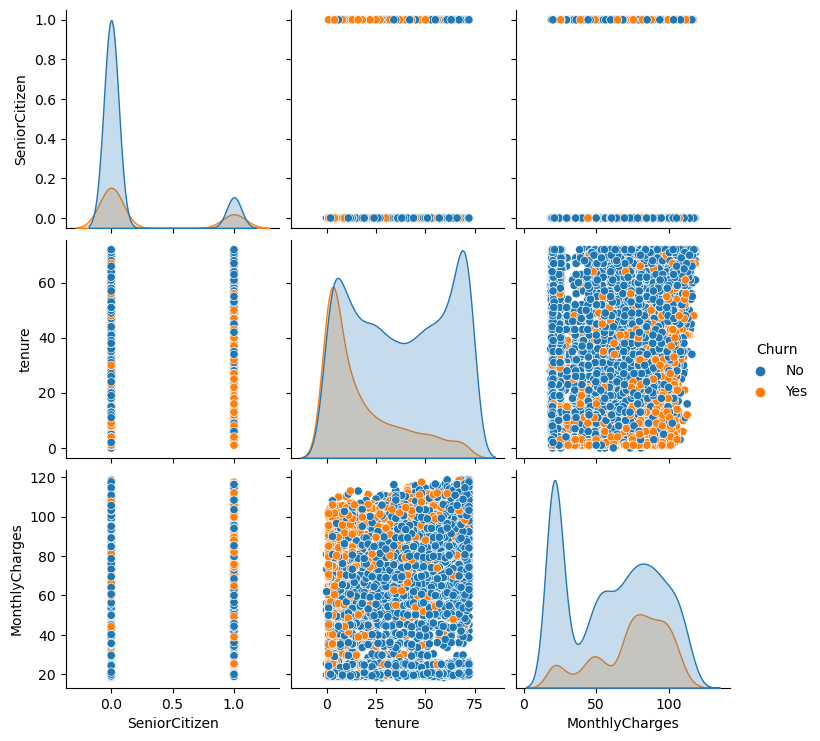

In [16]:
#I created a  pairplot with the hue defined by the ‘Churn' column feature
sns.pairplot(telco_data,hue='Churn')

In [17]:
#Data Cleaning By removing ‘gender’,  ‘customerID’,  and ‘tenure’ 

col =['gender','customerID','tenure']
telco_data = telco_data.drop(col,axis=1)

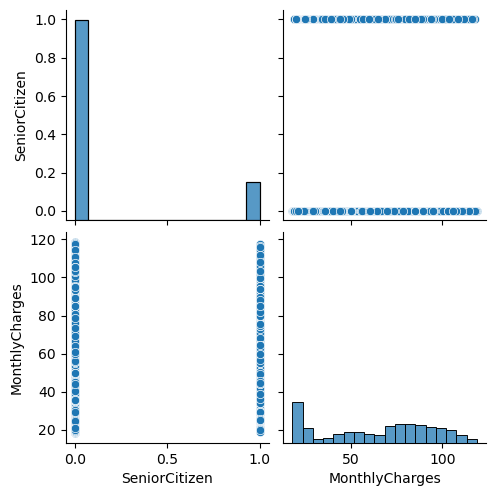

In [18]:
sns.pairplot(telco_data)

In [19]:
telco_data['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [20]:
telco_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.759492
std        30.075189
min        18.250000
25%        35.525000
50%        70.300000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [21]:
#‘TotalCharges’ contains a  string(“ “) at 488 position, I have to remove/ replace it using np.nan 
telco_data['TotalCharges']=telco_data['TotalCharges'].replace(" ",np.nan)
#coerce will replace all the non-numeric values
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')

In [22]:
#dropping all the rows in which there is a null values
# Removing all the rows which have null value in it
telco_data = telco_data.dropna(how='any', axis =0)

In [23]:
telco_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [24]:
telco_data['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

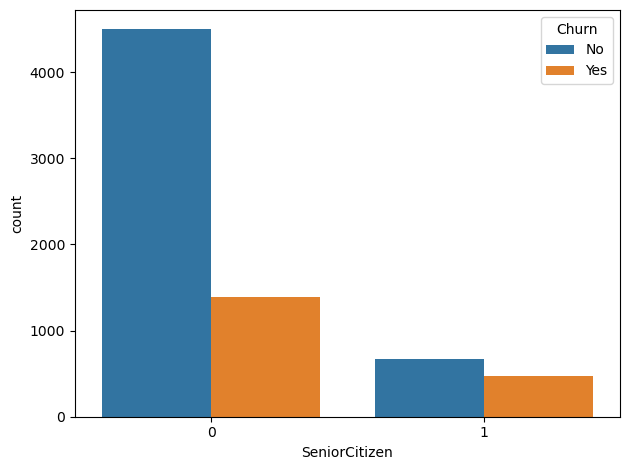

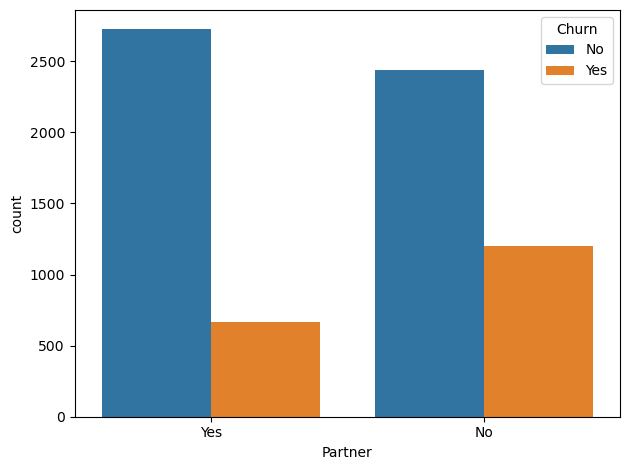

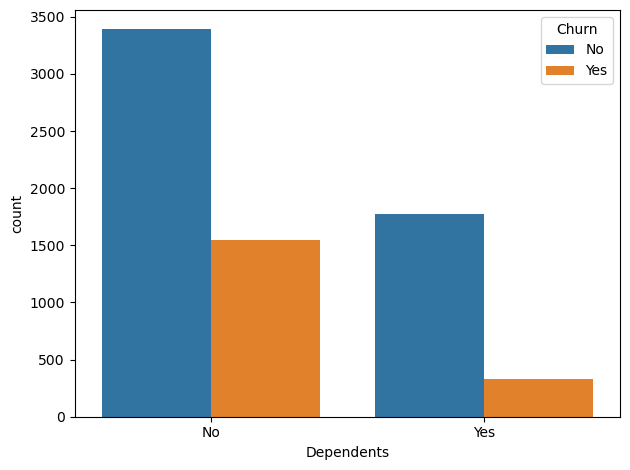

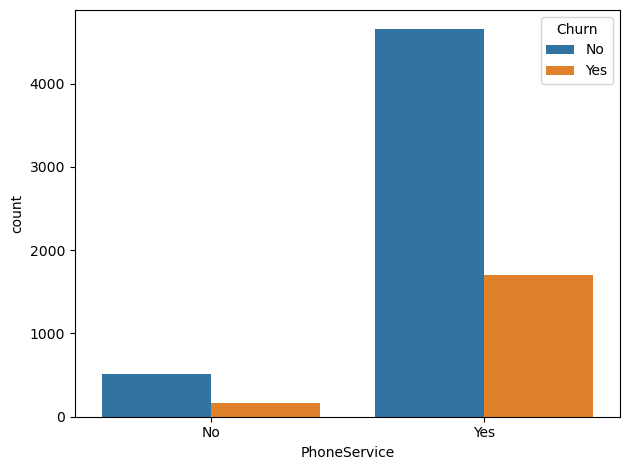

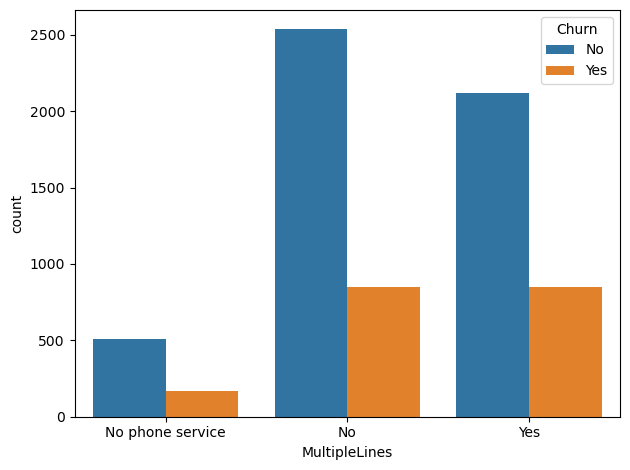

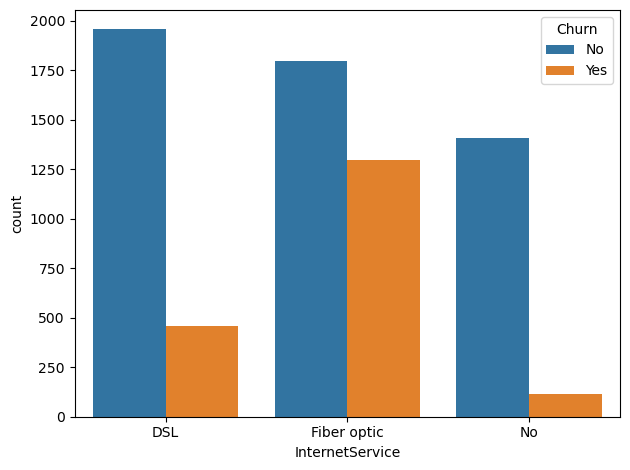

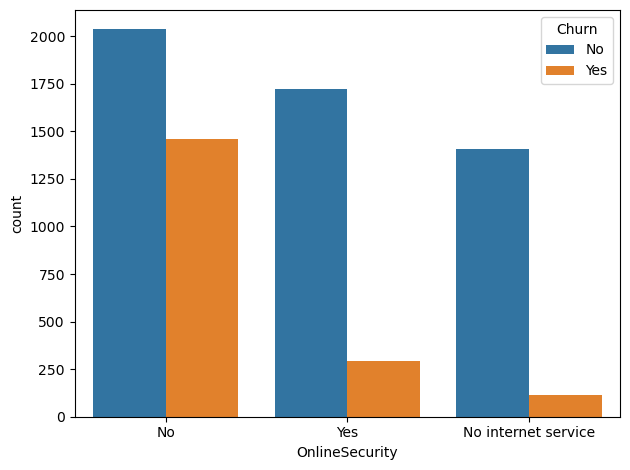

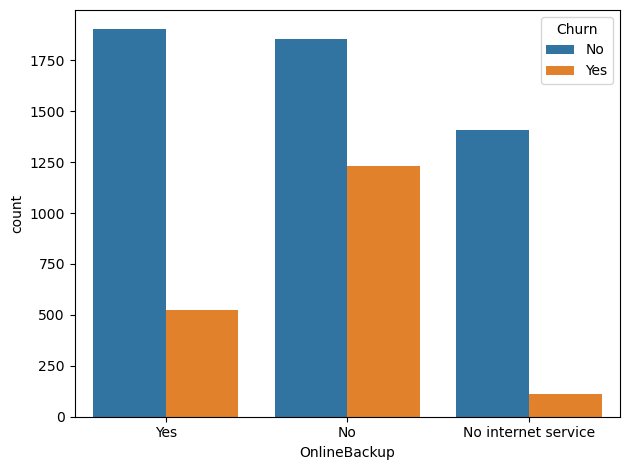

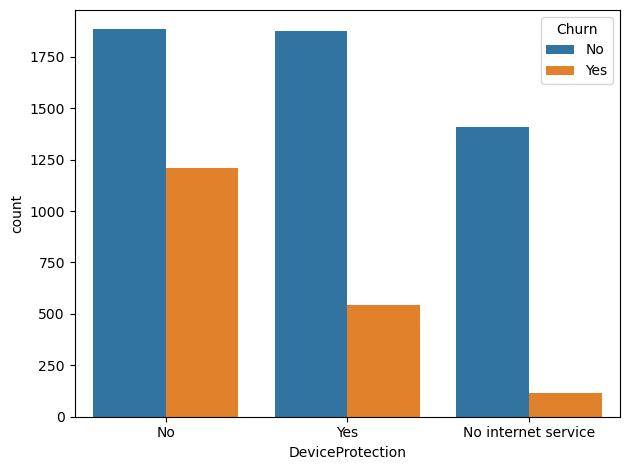

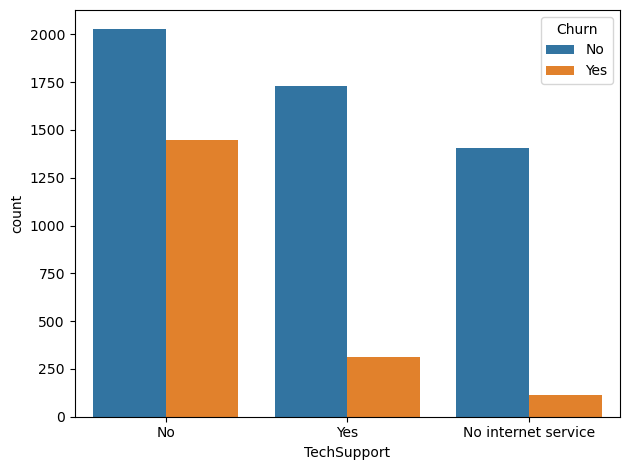

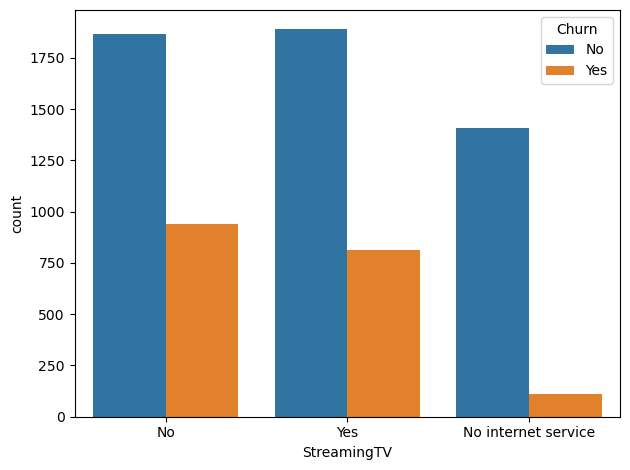

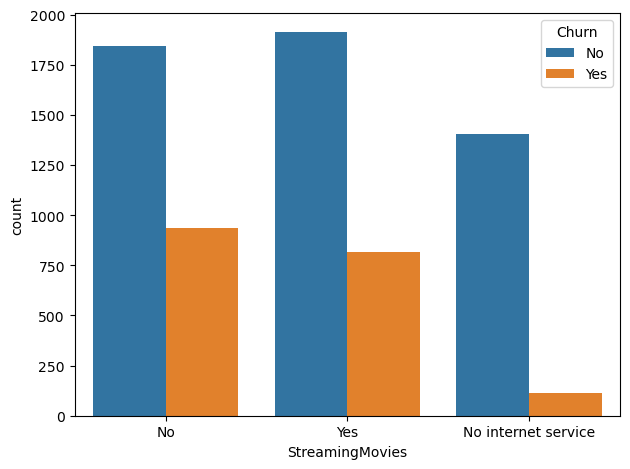

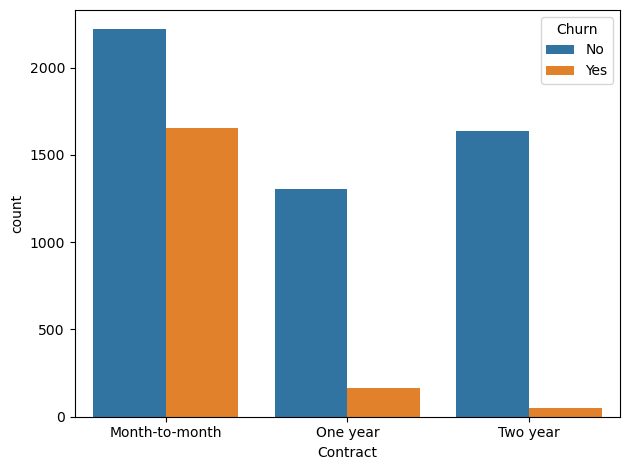

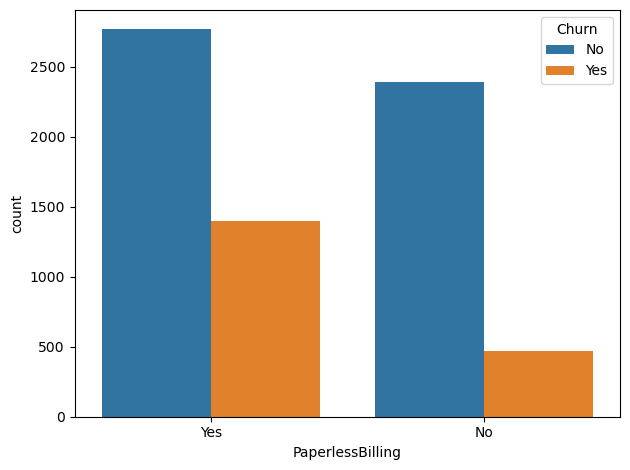

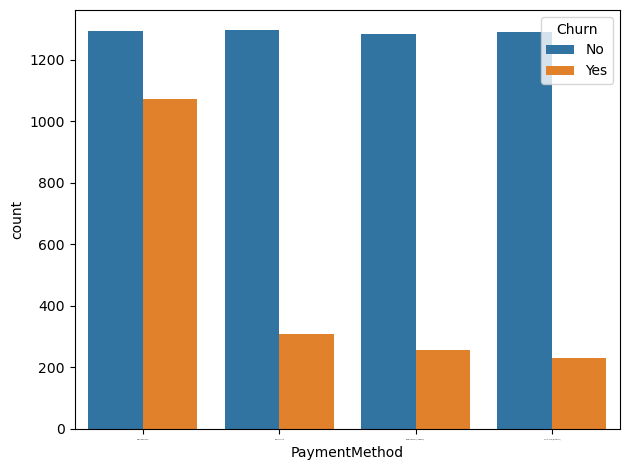

In [25]:
# visualized the data comparing Churn to TotalCharges and Monthly Charges
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    ax=sns.countplot(data=telco_data, x= predictor, hue='Churn')
    if predictor == "PaymentMethod":
        ax.set_xticklabels(ax.get_xticklabels(),fontsize=1)
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()

In [26]:
# Converting Yes as 1 and No as 0
telco_data['Churn']=telco_data["Churn"].replace(['Yes','No'],[1,0])

C:\Users\mnank\AppData\Local\Temp\ipykernel_25320\4245341954.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
telco_data

SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0                 0     Yes         No           No  No phone service   
1                 0      No         No          Yes                No   
2                 0      No         No          Yes                No   
3                 0      No         No           No  No phone service   
4                 0      No         No          Yes                No   
...             ...     ...        ...          ...               ...   
7038              0     Yes        Yes          Yes               Yes   
7039              0     Yes        Yes          Yes               Yes   
7040              0     Yes        Yes           No  No phone service   
7041              1     Yes         No          Yes               Yes   
7042              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              Electronic check           29.85         29.85      0  
1                  Mailed check           56.95       1889.50      0  
2                  Mailed check           53.85        108.15      1  
3     Bank transfer (automatic)           64.80       1840.75      0  
4              Electronic check           70.70        151.65      1  
...                         ...             ...           ...    ...  
7038               Mailed check           84.80       1990.50      0  
7039    Credit card (automatic)          103.20       7362.90      0  
7040           Electronic check           29.60        346.45      0  
7041               Mailed check           64.80        306.60      1  
7042  Bank transfer (automatic)          105.65       6844.50      0  

[7032 rows x 18 columns]

In [28]:
telco_data_dummies = pd.get_dummies(telco_data)
print(telco_data_dummies)

      SeniorCitizen  MonthlyCharges  TotalCharges  Churn  Partner_No  \
0                 0           29.85         29.85      0           0   
1                 0           56.95       1889.50      0           1   
2                 0           53.85        108.15      1           1   
3                 0           64.80       1840.75      0           1   
4                 0           70.70        151.65      1           1   
...             ...             ...           ...    ...         ...   
7038              0           84.80       1990.50      0           0   
7039              0          103.20       7362.90      0           0   
7040              0           29.60        346.45      0           0   
7041              1           64.80        306.60      1           0   
7042              0          105.65       6844.50      0           1   

      Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0               1              1               0                1 

In [29]:
# Now we are changing the correlation between all the data
churn_corr_matrix= telco_data_dummies.corr()

<AxesSubplot:>

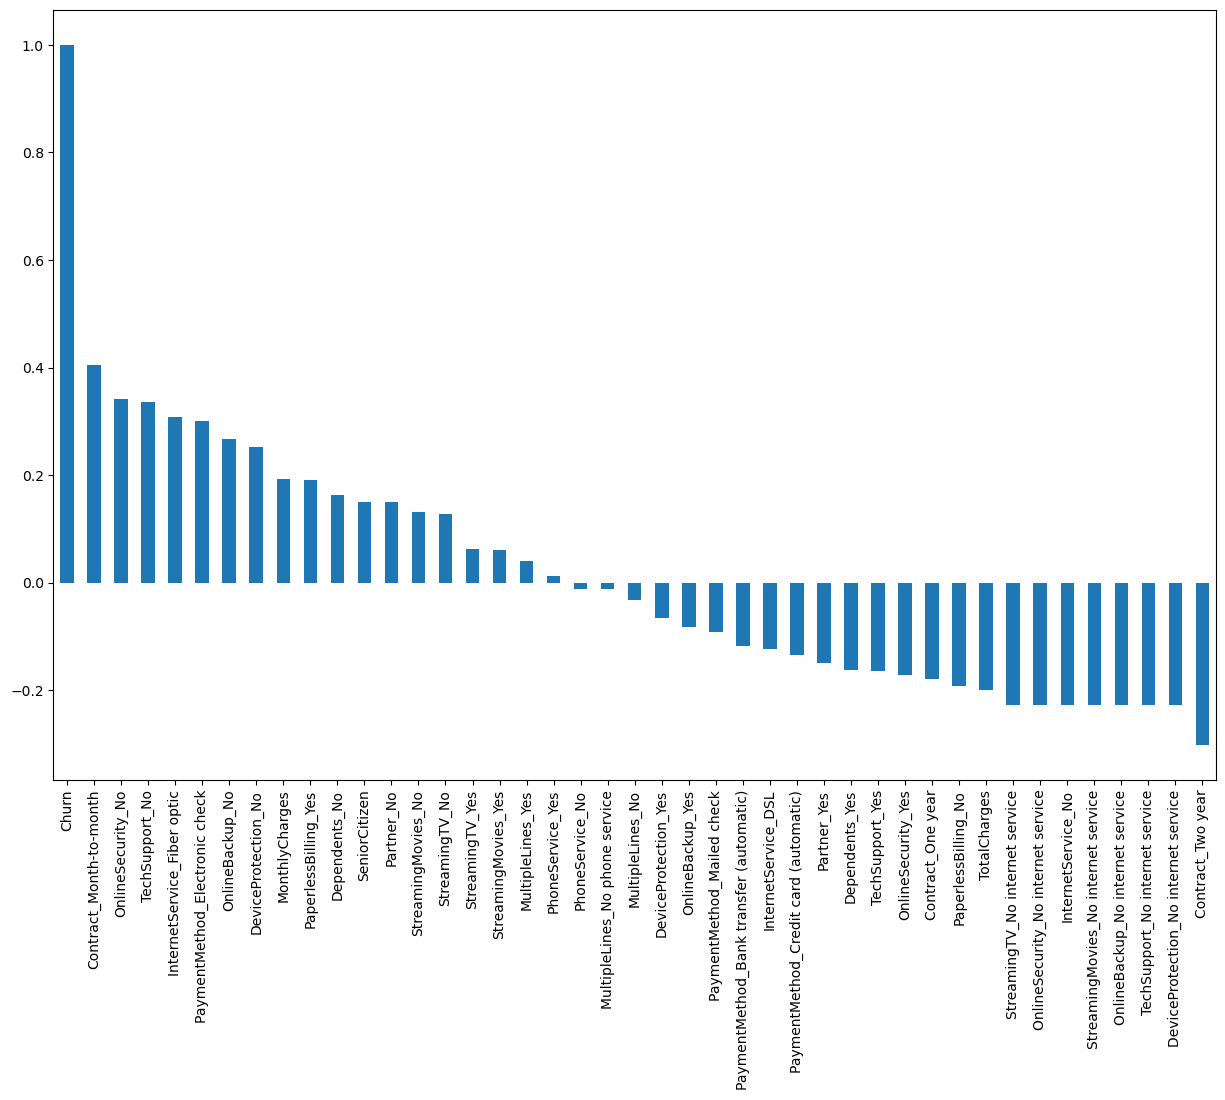

In [30]:
churn_corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(15,10))

In [31]:
#Checking the Correlation between all the columns
churn_corr_matrix['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192848
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
PhoneService

In [32]:
#Drop Churn where axis =1
X=telco_data_dummies.drop('Churn',axis=1)

In [33]:
X

SeniorCitizen  MonthlyCharges  TotalCharges  Partner_No  Partner_Yes  \
0                 0           29.85         29.85           0            1   
1                 0           56.95       1889.50           1            0   
2                 0           53.85        108.15           1            0   
3                 0           64.80       1840.75           1            0   
4                 0           70.70        151.65           1            0   
...             ...             ...           ...         ...          ...   
7038              0           84.80       1990.50           0            1   
7039              0          103.20       7362.90           0            1   
7040              0           29.60        346.45           0            1   
7041              1           64.80        306.60           0            1   
7042              0          105.65       6844.50           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7038              0               1                0                 1   
7039              0               1                0                 1   
7040              0               1                1                 0   
7041              1               0                0                 1   
7042              1               0                0                 1   

      MultipleLines_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                    0  ...                    0                        1   
1                    1  ...                    0                        0   
2                    1  ...                    0                        1   
3                    0  ...                    0                        0   
4                    1  ...                    0                        1   
...                ...  ...                  ...                      ...   
7038                 0  ...                    1                        0   
7039                 0  ...                    1                        0   
7040                 0  ...                    0                        1   
7041                 0  ...                    0                        1   
7042                 1  ...                    1                        0   

      Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                     0                  0                    0   
1                     1                  0                    1   
2                     0                  0                    0   
3                     1                  0                    1   
4                     0                  0                    0   
...                 ...                ...                  ...   
7038                  1                  0                    0   
7039                  1                  0                    0   
7040                  0                  0                    0   
7041                  0                  0                    0   
7042                  0                  1                    0   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                        1                                        0   
1                        0                                        0   
2                        1                                        0   
3                        0                                        1   
4                        1                                        0   
...                    .

In [34]:
#create y variable
y=telco_data_dummies['Churn']

In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [38]:
X.shape

(7032, 42)

In [40]:
y.shape

(7032,)

In [43]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [50]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote=SMOTE(random_state=0)

In [49]:
X_resampled_smote, y_resampled_smote=smote.fit_resample(X,y)

In [51]:
y_resampled_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [52]:
X_resampled_smote

SeniorCitizen  MonthlyCharges  TotalCharges  Partner_No  Partner_Yes  \
0                  0       29.850000     29.850000           0            1   
1                  0       56.950000   1889.500000           1            0   
2                  0       53.850000    108.150000           1            0   
3                  0       64.800000   1840.750000           1            0   
4                  0       70.700000    151.650000           1            0   
...              ...             ...           ...         ...          ...   
10321              0      103.976753    242.804921           0            1   
10322              0       35.824447     35.824447           1            0   
10323              0       44.493077   1061.960339           0            0   
10324              0       19.363055     19.363055           1            0   
10325              0       96.922890     96.922890           1            0   

       Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                  1               0                1                 0   
1                  1               0                0                 1   
2                  1               0                0                 1   
3                  1               0                1                 0   
4                  1               0                0                 1   
...              ...             ...              ...               ...   
10321              1               0                0                 1   
10322              1               0                1                 0   
10323              0               0                0                 0   
10324              1               0                0                 1   
10325              1               0                0                 1   

       MultipleLines_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                     0  ...                    0                        1   
1                     1  ...                    0                        0   
2                     1  ...                    0                        1   
3                     0  ...                    0                        0   
4                     1  ...                    0                        1   
...                 ...  ...                  ...                      ...   
10321                 0  ...                    1                        1   
10322                 0  ...                    1                        1   
10323                 0  ...                    0                        1   
10324                 1  ...                    0                        1   
10325                 0  ...                    1                        1   

       Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                      0                  0                    0   
1                      1                  0                    1   
2                      0                  0                    0   
3                      1                  0                    1   
4                      0                  0                    0   
...                  ...                ...                  ...   
10321                  0                  0                    0   
10322                  0                  0                    0   
10323                  0                  0                    0   
10324                  0                  0                    0   
10325                  0                  0                    0   

       PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                         1                                        0   
1                         0                                        0   
2                         1                                        0   
3                         0                                        1   
4                         1                

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
X_smote_train,X_smote_test,y_smote_train,y_smote_test=train_test_split(X_resampled_smote,y_resampled_smote,test_size=0.2,random_state=42)

In [60]:
LogReg=LogisticRegression()

In [61]:
LogReg.fit(X_smote_train,y_smote_train)

C:\Users\mnank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [63]:
y_smote_pred=LogReg.predict(X_smote_test)

In [64]:
y_smote_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [65]:
#Create Classification report and Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


In [66]:
# Classification Report
classification_rep = classification_report(y_smote_test, y_smote_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1037
           1       0.84      0.81      0.82      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_smote_test, y_smote_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[872 165]
 [191 838]]
